<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Result_Analysis_(With_Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Label Encoding + Decision Tree done by Manbhav
Pipeline + Split + Lin Reg + KNN + Result Analysis + Pipeline Version edits done by Yasseen
Tree Regressor done by Tanmay
Clustering done by Aditya
Neural Network done by Yasseen + Manbhav

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price.csv', encoding = 'latin1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


In [2]:
data['target'] = (data['Price_usd']).astype(int)
del data['Price_usd']

In [3]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


In [4]:
data_features = data.drop(["target", "Price_euros"], axis=1)

In [5]:
print(data["Company"].unique())
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1

print(Acer_count,Asus_count,Apple_count,Chuwi_count,Dell_count,HP_count,Huawei_count,Lenovo_count,LG_count,Media_count,Microsoft_count,Msi_count,razer_count,samsung_count,toshi_count,vero_count,Xiaomi_count)

data["Company_converted"] = Company_names
print(data[["Company","Company_converted"]].head())

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])
print(data[['Company_converted', 'Company_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'Lenovo' 'LG' 'Mediacom' 'Microsoft' 'MSI' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
103 158 21 3 297 274 2 297 3 7 6 54 7 9 48 4 4
  Company Company_converted
0    Acer              Acer
1    Acer              Acer
2    Acer              Acer
3    Acer              Acer
4    Acer              Acer
  Company_converted  Company_Label
0              Acer              0
1              Acer              0
2              Acer              0
3              Acer              0
4              Acer              0
Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Microsoft': np.int64(13), 'Razer': np.int64(14), 'Samsung': np.int64(15), 'Toshiba': np.int64(16), 'Vero': np.i

In [6]:
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands
print(data[["Gpu","Gpu_Brands"]].head())

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])
print(data[['Gpu_Brands', 'Gpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

722
400
180
1302
                      Gpu Gpu_Brands
0           AMD Radeon R5        AMD
1  Intel UHD Graphics 620      Intel
2   Intel HD Graphics 620      Intel
3  Intel UHD Graphics 620      Intel
4    Nvidia GeForce MX150     Nvidia
  Gpu_Brands  Gpu_Brands_Label
0        AMD                 0
1      Intel                 2
2      Intel                 2
3      Intel                 2
4     Nvidia                 3
Label mapping: {'AMD': np.int64(0), 'ARM': np.int64(1), 'Intel': np.int64(2), 'Nvidia': np.int64(3)}


In [7]:
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands
print(data[["Cpu","Cpu_Brands"]].head())

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])
print(data[['Cpu_Brands', 'Cpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

                          Cpu Cpu_Brands
0     AMD A9-Series 9420 3GHz        AMD
1  Intel Core i5 8250U 1.6GHz    Core i5
2  Intel Core i3 7130U 2.7GHz    Core i3
3  Intel Core i5 8250U 1.6GHz    Core i5
4  Intel Core i7 8550U 1.8GHz    Core i7
  Cpu_Brands  Cpu_Brands_Label
0        AMD                 0
1    Core i5                 5
2    Core i3                 4
3    Core i5                 5
4    Core i7                 6
Label mapping: {'AMD': np.int64(0), 'Atom': np.int64(1), 'Celeron': np.int64(2), 'Core M': np.int64(3), 'Core i3': np.int64(4), 'Core i5': np.int64(5), 'Core i7': np.int64(6), 'Pentium': np.int64(7), 'Samsung': np.int64(8), 'Xeon': np.int64(9)}


In [8]:
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names
print(data[["TypeName","TypeName_converted"]].head())

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])
print(data[['TypeName_converted', 'TypeName_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
727
196
121
205
25
29
    TypeName TypeName_converted
0   Notebook           Notebook
1  Ultrabook          Ultrabook
2   Notebook           Notebook
3   Notebook           Notebook
4   Notebook           Notebook
  TypeName_converted  TypeName_Label
0           Notebook               3
1          Ultrabook               4
2           Notebook               3
3           Notebook               3
4           Notebook               3
Label mapping: {'Convertible': np.int64(0), 'Gaming': np.int64(1), 'Netbook': np.int64(2), 'Notebook': np.int64(3), 'Ultrabook': np.int64(4), 'Workstation': np.int64(5)}


In [9]:
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

print(count_2,count_4,count_6,count_8,count_12,count_16,count_24,count_32,count_64)
data["Ram_types"] = ram_types
print(data[["Ram","Ram_types"]].head())


['4GB' '8GB' '6GB' '12GB' '2GB' '16GB' '32GB' '24GB' '64GB']
22 375 41 619 25 200 3 17 1
   Ram Ram_types
0  4GB         4
1  8GB         8
2  4GB         4
3  4GB         4
4  8GB         8


In [10]:
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems
print(data[["OpSys","Operating_system"]].head())

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])
print(data[['OperatingSys_label', 'Operating_system']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

        OpSys Operating_system
0  Windows 10       Windows 10
1  Windows 10       Windows 10
2       Linux            Linux
3  Windows 10       Windows 10
4  Windows 10       Windows 10
   OperatingSys_label Operating_system
0                   5       Windows 10
1                   5       Windows 10
2                   2            Linux
3                   5       Windows 10
4                   5       Windows 10
Label mapping: {'Android': np.int64(0), 'Chrome OS': np.int64(1), 'Linux': np.int64(2), 'Mac OS': np.int64(3), 'No OS': np.int64(4), 'Windows 10': np.int64(5), 'Windows 7': np.int64(6)}


In [11]:
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)
print(data[['Memory', 'Memory_GB']].head())




      Memory  Memory_GB
0  500GB HDD      500.0
1  256GB SSD      256.0
2    1TB HDD     1000.0
3  256GB SSD      256.0
4  256GB SSD      256.0


In [12]:
data["Weight"] = data["Weight"].str.replace("kg", "")

In [13]:
columns = (data.columns)
print(columns)
#data['Price_usd'].corr(data["Inches"]) #Correlation: 0.06819666592963934
# data['Price_usd'].corr(data['Company_Label'])#Correlation: 0.14037073774267358
#data['Price_usd'].corr(data['Cpu_Brands_Label'])#Correlation: 0.5032980391739731
#data['Price_usd'].corr(data['Gpu_Brands_Label'])#Correlation: 0.32253518923424707
# data['Price_usd'].corr(data['TypeName_Label'])#Correlation: -0.12731348959766342
# data['Price_usd'].corr(data['Ram_types'])#Correlation: 0.743007135250695
#data['Price_usd'].corr(data['OperatingSys_label'])#Correlation: 0.24147677862687902
#data['Price_usd'].corr(data['Memory_GB'])#Correlation: 0.16081888650343074
#data['Price_usd'].corr(data['Weight']) #Correlation: 0.21036979891687177
data.drop("laptop_ID",axis = 1)
data.drop("Price_euros",axis = 1)




Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'target', 'Company_converted', 'Company_Label',
       'Gpu_Brands', 'Gpu_Brands_Label', 'Cpu_Brands', 'Cpu_Brands_Label',
       'TypeName_converted', 'TypeName_Label', 'Ram_types', 'Operating_system',
       'OperatingSys_label', 'Memory_GB'],
      dtype='object')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_Brands,Gpu_Brands_Label,Cpu_Brands,Cpu_Brands_Label,TypeName_converted,TypeName_Label,Ram_types,Operating_system,OperatingSys_label,Memory_GB
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,...,AMD,0,AMD,0,Notebook,3,4,Windows 10,5,500.0
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Ultrabook,4,8,Windows 10,5,256.0
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,...,Intel,2,Core i3,4,Notebook,3,4,Linux,2,1000.0
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Notebook,3,4,Windows 10,5,256.0
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,8,Windows 10,5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,...,Intel,2,Atom,1,Notebook,3,4,Windows 10,5,32.0
1299,188,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Notebook,3,8,No OS,4,256.0
1300,196,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Ultrabook,4,8,No OS,4,256.0
1301,521,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,16,No OS,4,256.0


In [14]:
numfeat = ["Inches", "Cpu_Brands_Label", "TypeName_Label", "Ram_types", "OperatingSys_label", "Memory_GB", "Gpu_Brands_Label"]
catfeat = ["Product", "ScreenResolution", "Weight"]

num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

full_pipeline = ColumnTransformer([("num", num_pipeline, numfeat), ("cat", cat_pipeline, catfeat)])

In [15]:
data.groupby("Company")["target"].mean().sort_values(ascending=False)

,target
Company,
Razer,3653.142857
LG,2291.333333
MSI,1887.277778
Google,1831.666667
Microsoft,1760.000000
Apple,1707.428571
Huawei,1554.000000
Samsung,1542.777778
Toshiba,1383.812500


In [16]:
data_features = data[numfeat + catfeat]
datafeatpp = full_pipeline.fit_transform(data_features)
display(datafeatpp)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13030 stored elements and shape (1303, 844)>

Let's do a Linear Regression on our data! (Yasseen)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = datafeatpp
y = data["target"].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(xtrain, ytrain)

y_pred = model1.predict(xtest)

print(f"R-squared score: {r2_score(ytest, model1.predict(xtest)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, y_pred):.2f}")

R-squared score: 0.76
Mean Absolute Error (MAE): 248.06
Mean Squared Error (MSE): 109269.95
Root Mean Squared Error (RMSE): 330.56


Let's visualize the basic linear regression

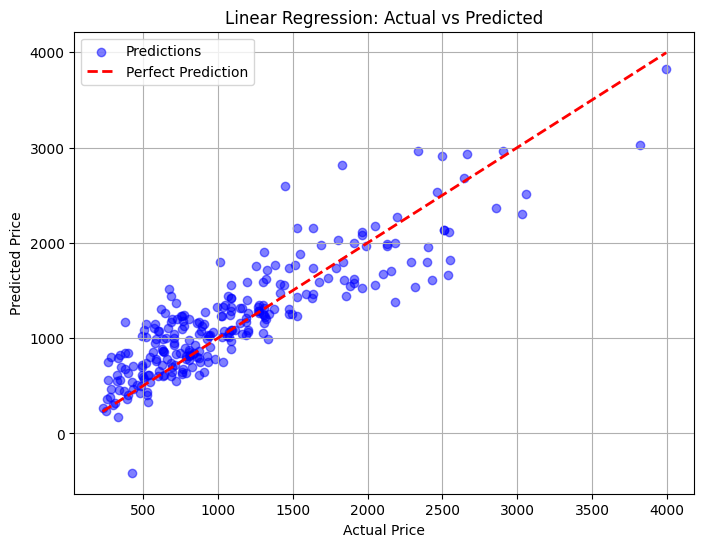

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred, color='blue', label="Predictions", alpha = 0.5)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

So it might not be working well, so let's try L2 regularization since we want to keep features:

In [47]:
from sklearn.linear_model import RidgeCV
#First, let's try to find the best alpha value by using cross validation
alphas = [0.01, 0.1, 1, 10, 100]

ridgecv = LassoCV(alphas = alphas, cv = 5)
ridgecv.fit(xtrain, ytrain)

print(f"The best alpha value is", ridgecv.alpha_)

The best alpha value is 0.1


In [48]:
from sklearn.linear_model import Ridge

modelrgde = Ridge(alpha = 0.1)
modelrgde.fit(xtrain, ytrain)
y_pred = modelrgde.predict(xtest)

print(f"R-squared score: {r2_score(ytest, modelrgde.predict(xtest)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, y_pred):.2f}")

R-squared score: 0.81
Mean Absolute Error (MAE): 219.44
Mean Squared Error (MSE): 83534.40
Root Mean Squared Error (RMSE): 289.02


Let's visualize it

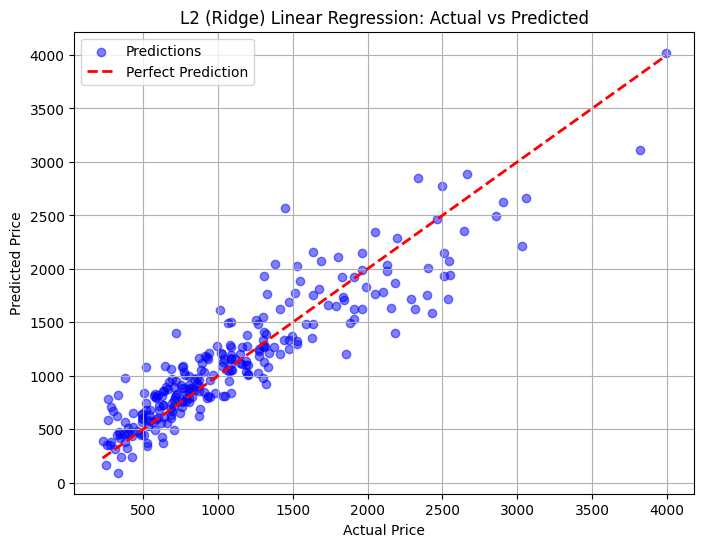

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("L2 (Ridge) Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

Great! It works even better now with L2 regression (ridge)! Note that our hyperparam, alpha, cannot be too high or too low as the model may underfit or overfit the data.

But what about L1 regression (lasso)?

In [50]:
from sklearn.linear_model import LassoCV
#First, let's try to find the best alpha value by using cross validation
alphas = [0.01, 0.1, 1, 10, 100]

lassocv = LassoCV(alphas = alphas, cv = 5)
lassocv.fit(xtrain, ytrain)

print(f"The best alpha value is", lassocv.alpha_)

The best alpha value is 0.1


In [51]:
from sklearn.linear_model import Lasso

modelrgo = Lasso(alpha = 0.1)
modelrgo.fit(xtrain, ytrain)
y_pred = modelrgo.predict(xtest)

print(f"R-squared score: {r2_score(ytest, modelrgo.predict(xtest)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, y_pred):.2f}")

R-squared score: 0.84
Mean Absolute Error (MAE): 198.50
Mean Squared Error (MSE): 73296.90
Root Mean Squared Error (RMSE): 270.73


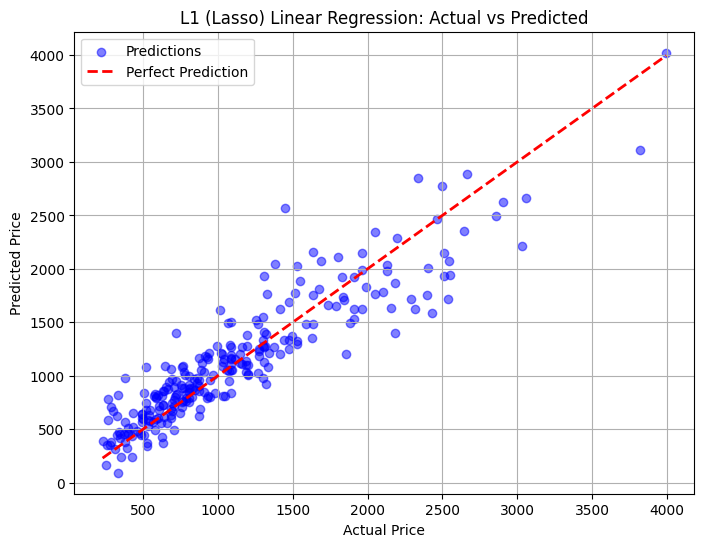

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("L1 (Lasso) Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

Now we will look at KNN. Note that we may need the label encoded versions of the values for this. (Yasseen)

In [23]:
knn = KNeighborsRegressor(n_neighbors=6) #This was the best value I tested
knn.fit(xtrain, ytrain)
raw_predicted = knn.predict(xtest)

print(f"R-squared score: {r2_score(ytest, raw_predicted):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, raw_predicted):.2f}")

R-squared score: 0.75
Mean Absolute Error (MAE): 232.12
Mean Squared Error (MSE): 112588.92
Root Mean Squared Error (RMSE): 335.54


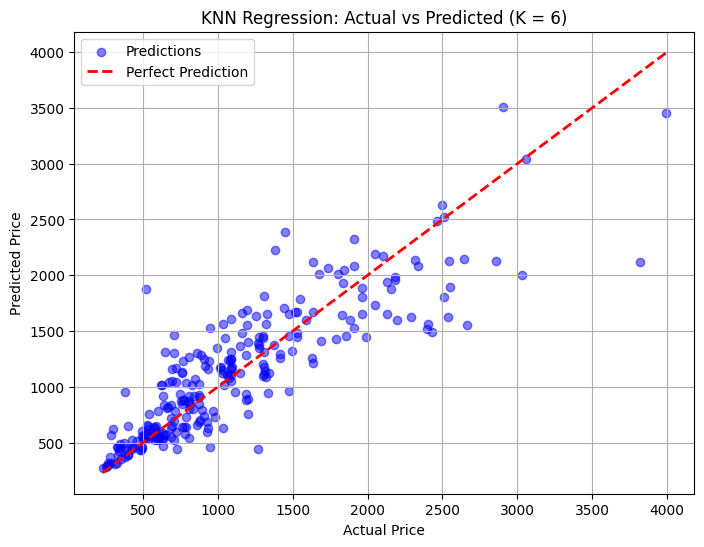

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, raw_predicted, color='blue', alpha=0.5, label="Predictions")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs Predicted (K = 6)")
plt.legend()
plt.grid(True)

Our R^2 score is not very good, so let's see how it does with other K values in specific ranges. Since we already tried a range of 5-10, let's try 1-3, so 2. (k is hyperparam)

In [25]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain, ytrain)
raw_predicted = knn.predict(xtest)

print(f"R-squared score: {r2_score(ytest, raw_predicted):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, raw_predicted):.2f}")

R-squared score: 0.77
Mean Absolute Error (MAE): 225.11
Mean Squared Error (MSE): 102595.68
Root Mean Squared Error (RMSE): 320.31


Let's plot out the KNN with our new value:

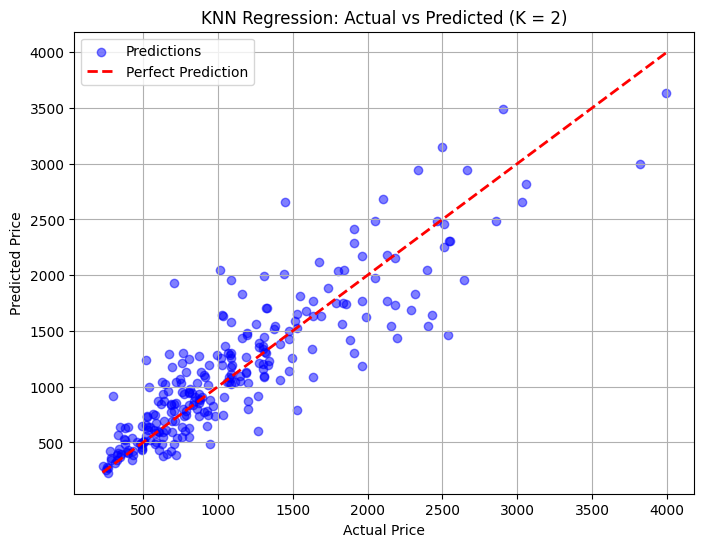

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, raw_predicted, color='blue', alpha=0.5, label="Predictions")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], '--', linewidth=2, label="Perfect Prediction", color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs Predicted (K = 2)")
plt.legend()
plt.grid(True)

Now let's do a decision tree (Manbhav)

MAE: 235.0328387380173
MSE: 118818.63841242286
RMSE: 344.7007954914274
R² Score: 0.7367807141965619


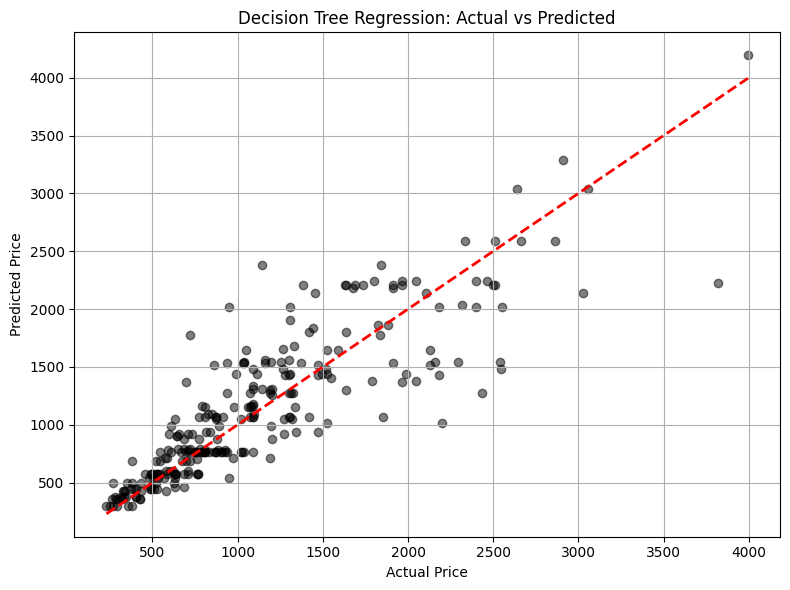

In [27]:
# this is our input features  list
X = datafeatpp
# output or target
y = data["target"].values

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Training the data


dtr = DecisionTreeRegressor(max_depth = 25,min_samples_leaf=5,max_leaf_nodes=92,random_state=42) # can add splitter = 'random' to reduce overfitting as well
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


Let's visualize our tree:

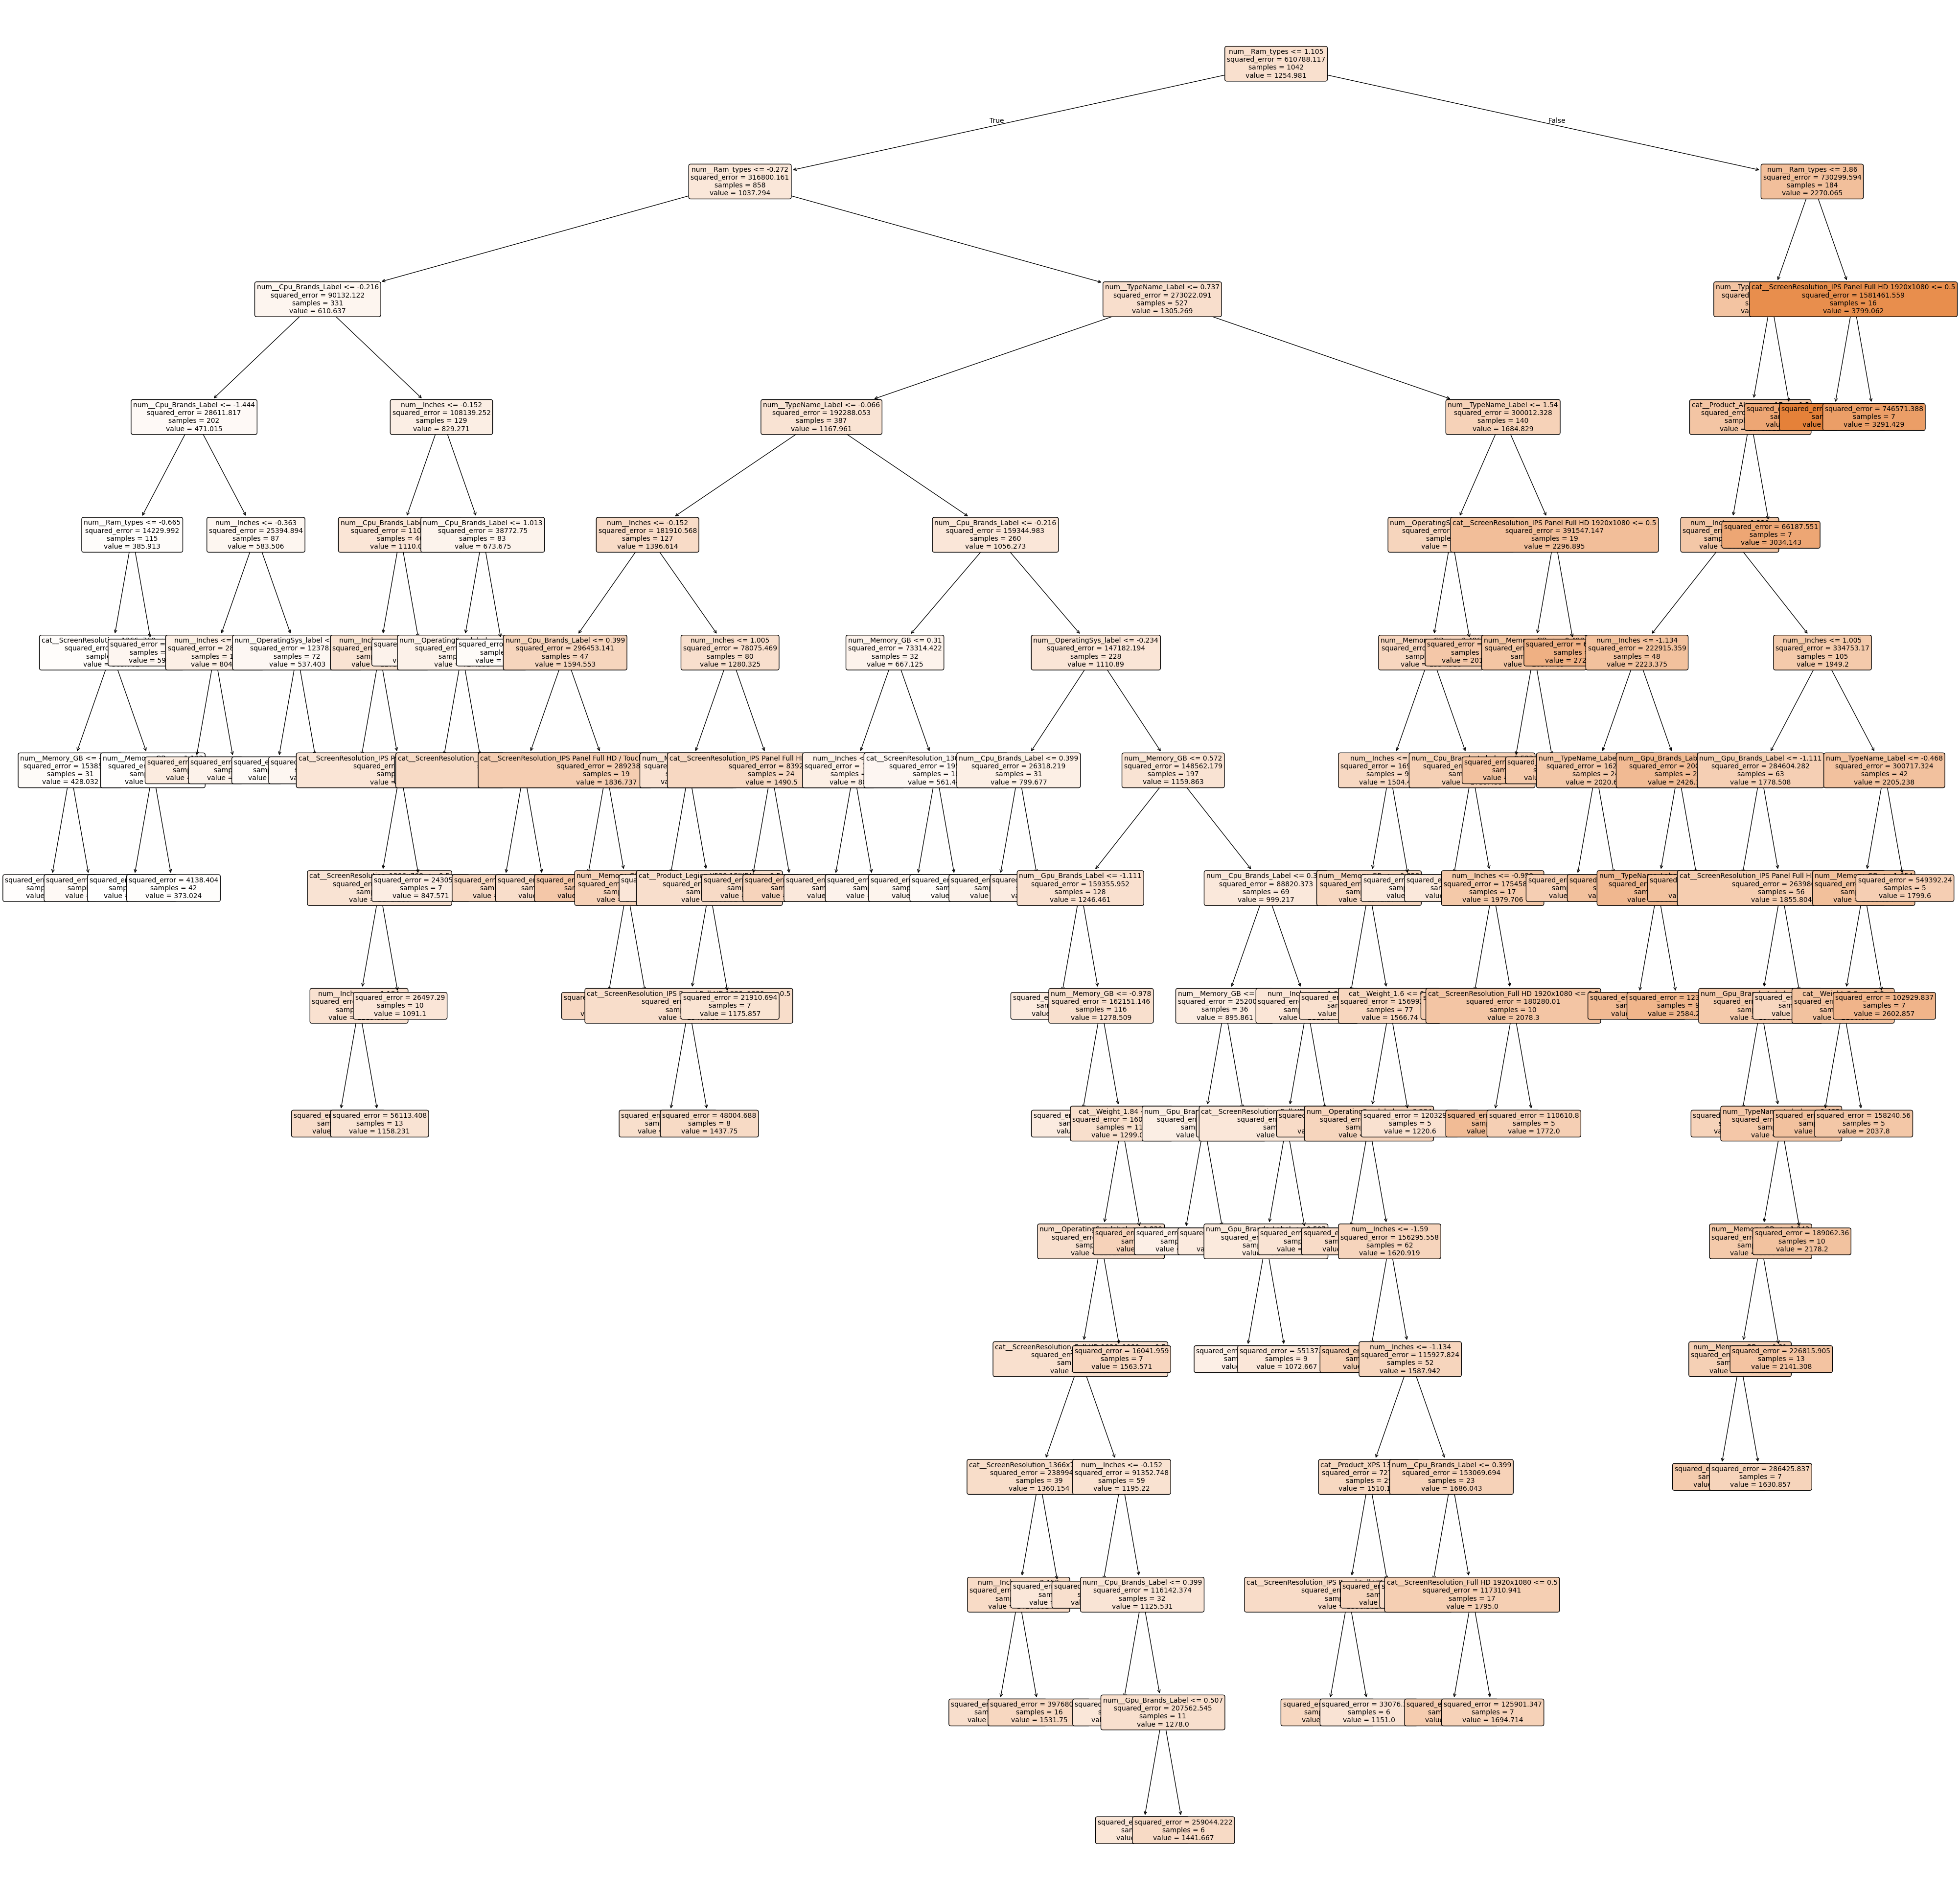

In [28]:
from sklearn import tree
feature_names = full_pipeline.get_feature_names_out()

plt.figure(figsize=(50,50))
tree.plot_tree(dtr, filled=True, feature_names=feature_names, rounded=True, fontsize=10)
plt.show()

Let's try to tune a hyperparameter on the tree

In [29]:
#FIGURING OUT BEST MAX_DEPTH
best_rmse = float('inf')
best_rmse_depth = None
best_rmse_mae = None
best_rmse_r2 = None

best_mae = float('inf')
best_mae_depth = None
best_mae_rmse = None
best_mae_r2 = None

best_r2 = float('-inf')
best_r2_depth = None
best_r2_rmse = None
best_r2_mae = None
for depth in range(1, 1000):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_depth = depth
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_depth = depth
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_depth = depth
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| Depth:", best_rmse_depth, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| Depth:", best_mae_depth, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| Depth:", best_r2_depth, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))

Best RMSE: 313.077 | Depth: 12 | MAE: 214.812 | R²: 0.783
Best MAE : 213.178 | Depth: 16 | RMSE: 318.08 | R²: 0.776
Best R²  : 0.783 | Depth: 12 | RMSE: 313.077 | MAE: 214.812


In [30]:
#FIGURING OUT BEST MIN_SAMPLES_LEAF
best_rmse = float('inf')
best_rmse_leaf = None
best_rmse_mae = None
best_rmse_r2 = None

best_mae = float('inf')
best_mae_leaf = None
best_mae_rmse = None
best_mae_r2 = None

best_r2 = float('-inf')
best_r2_leaf = None
best_r2_rmse = None
best_r2_mae = None

for leaf_size in range(1, 1000):
    model = DecisionTreeRegressor(max_depth=25, min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_leaf = leaf_size
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_leaf = leaf_size
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_leaf = leaf_size
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| min_samples_leaf:", best_rmse_leaf, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| min_samples_leaf:", best_mae_leaf, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| min_samples_leaf:", best_r2_leaf, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))

Best RMSE: 323.713 | min_samples_leaf: 2 | MAE: 227.44 | R²: 0.768
Best MAE : 224.278 | min_samples_leaf: 1 | RMSE: 352.396 | R²: 0.725
Best R²  : 0.768 | min_samples_leaf: 2 | RMSE: 323.713 | MAE: 227.44


In [31]:
#FIGURING OUT BEST MAX_LEAF_NODES
best_rmse = float('inf')
best_rmse_mae = None
best_rmse_r2 = None

best_mae = float('inf')
best_mae_rmse = None
best_mae_r2 = None

best_r2 = float('-inf')
best_r2_rmse = None
best_r2_mae = None

for leaf_nodes in range(2, 1000):
    model = DecisionTreeRegressor(max_depth=25,min_samples_leaf=5,max_leaf_nodes=leaf_nodes,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_leaf_nodes = leaf_nodes
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_leaf_nodes = leaf_nodes
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_leaf_nodes = leaf_nodes
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| max_leaf_nodes:", best_rmse_leaf_nodes, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| max_leaf_nodes:", best_mae_leaf_nodes, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| max_leaf_nodes:", best_r2_leaf_nodes, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))

Best RMSE: 340.512 | max_leaf_nodes: 70 | MAE: 232.555 | R²: 0.743
Best MAE : 232.555 | max_leaf_nodes: 70 | RMSE: 340.512 | R²: 0.743
Best R²  : 0.743 | max_leaf_nodes: 70 | RMSE: 340.512 | MAE: 232.555


Forest Tree:

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 20, random_state = 42, max_depth = 20, max_features = 2)
forest.fit(xtrain, ytrain)
forest_y_pred = forest.predict(xtest)
mae = mean_absolute_error(ytest, forest_y_pred)
print(f"R-squared score: {r2_score(ytest, raw_predicted):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(ytest, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(ytest, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(ytest, raw_predicted):.2f}")

R-squared score: 0.77
Mean Absolute Error (MAE): 225.11
Mean Squared Error (MSE): 102595.68
Root Mean Squared Error (RMSE): 320.31


Now let's try to find the right hyperparam for the forest:

In [33]:
from sklearn import model_selection
estimators = [20, 50, 100]
depths = [20, 50, 100]
max_features = [1, 2, 5]
for estimator in estimators:
  for depth in depths:
    for max_feature in max_features:
      kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
      model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, max_features=max_feature)
      result_kfold = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
      print('e=', estimator, 'depth=', depth, 'max features=', max_feature, 'mean accuracy=%.2f%%' % (result_kfold.mean() * 100.0))

e= 20 depth= 20 max features= 1 mean accuracy=16.01%
e= 20 depth= 20 max features= 2 mean accuracy=22.84%
e= 20 depth= 20 max features= 5 mean accuracy=36.48%
e= 20 depth= 50 max features= 1 mean accuracy=44.35%
e= 20 depth= 50 max features= 2 mean accuracy=49.05%
e= 20 depth= 50 max features= 5 mean accuracy=66.20%
e= 20 depth= 100 max features= 1 mean accuracy=65.84%
e= 20 depth= 100 max features= 2 mean accuracy=71.75%
e= 20 depth= 100 max features= 5 mean accuracy=75.64%
e= 50 depth= 20 max features= 1 mean accuracy=17.68%
e= 50 depth= 20 max features= 2 mean accuracy=23.10%
e= 50 depth= 20 max features= 5 mean accuracy=37.79%
e= 50 depth= 50 max features= 1 mean accuracy=45.98%
e= 50 depth= 50 max features= 2 mean accuracy=47.27%
e= 50 depth= 50 max features= 5 mean accuracy=65.17%
e= 50 depth= 100 max features= 1 mean accuracy=69.17%
e= 50 depth= 100 max features= 2 mean accuracy=71.55%
e= 50 depth= 100 max features= 5 mean accuracy=77.48%
e= 100 depth= 20 max features= 1 mean ac

Now let's make a neural network:

Iteration 1, loss = 1091179.38661273
Iteration 2, loss = 1078063.17678010
Iteration 3, loss = 1034226.01494218
Iteration 4, loss = 933481.53295644
Iteration 5, loss = 748260.28662124
Iteration 6, loss = 480785.44093493
Iteration 7, loss = 225502.48573603
Iteration 8, loss = 139940.74318258
Iteration 9, loss = 139480.06133642
Iteration 10, loss = 89985.31455768
Iteration 11, loss = 74469.23608561
Iteration 12, loss = 69603.24772354
Iteration 13, loss = 57848.10006954
Iteration 14, loss = 53800.56754097
Iteration 15, loss = 47984.56295930
Iteration 16, loss = 42582.70461138
Iteration 17, loss = 39539.87558990
Iteration 18, loss = 35907.04962055
Iteration 19, loss = 32475.15820653
Iteration 20, loss = 30184.51910964
Iteration 21, loss = 27824.79692763
Iteration 22, loss = 25995.80305286
Iteration 23, loss = 24413.88027699
Iteration 24, loss = 22638.89289057
Iteration 25, loss = 21039.43110221
Iteration 26, loss = 19648.10273942
Iteration 27, loss = 18431.24927629
Iteration 28, loss = 1745

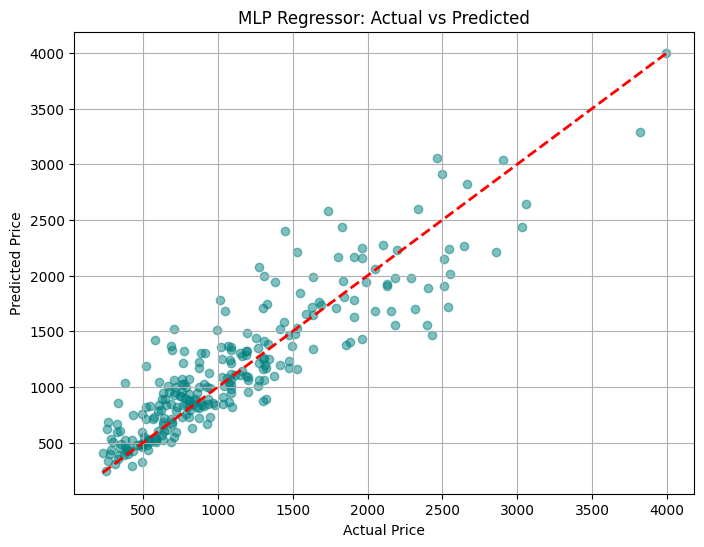

In [41]:
data_features = data[numfeat + catfeat]

x = full_pipeline.fit_transform(data_features)  # Transformed features from numeric and categorical pipeline
y = data["target"].values # The target variable of price_usd

#Do the split again just in case
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# The structure was pretty hard to get
mlp = MLPRegressor(
    hidden_layer_sizes = (100, 50),     # Note for team: You guys can expirement with layer sizes, isn't a set amount
    activation = 'relu',                # ReLU activation function
    solver = 'adam',                    # Optimizer
    learning_rate_init = 0.01,          # Initial learning rate
    max_iter = 500,                     # Maximum number of training iterations for model
    random_state = 42,
    verbose = True
)

mlp.fit(xtrain, ytrain)

y_pred = mlp.predict(xtest)

mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print(f"R-squared Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred, alpha=0.5, color='teal')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MLP Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

Make a bar graph of the six regression types in order to see which model performs the best.

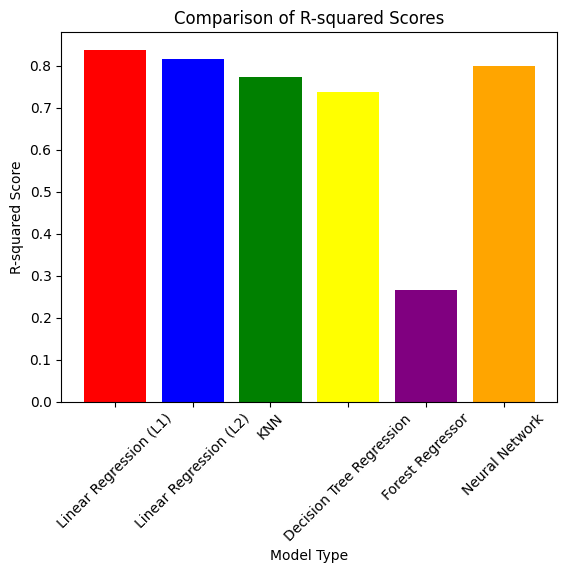

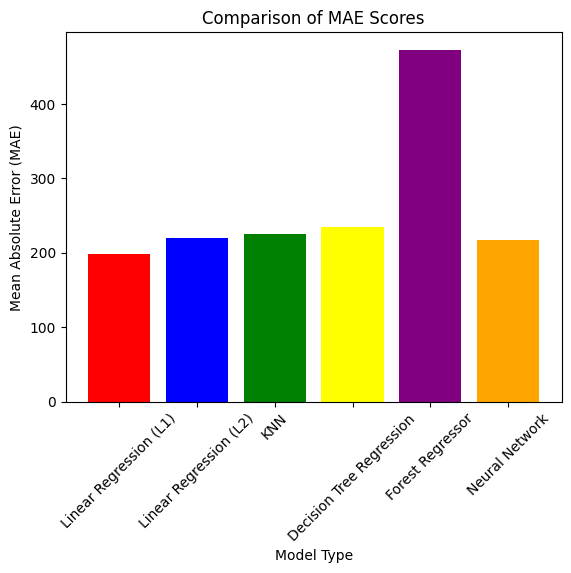

In [53]:
#This is the R squared score comparison
models = {"Linear Regression (L1)": modelrgo, "Linear Regression (L2)": modelrgde, "KNN": knn, "Decision Tree Regression": dtr, "Forest Regressor": forest, "Neural Network": mlp}
r2_scores = [r2_score(ytest, model.predict(xtest)) for model in models.values()]

plt.bar(models.keys(), r2_scores, color=["red", "blue", "green", "yellow", "purple", "orange"])
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("R-squared Score")
plt.title("Comparison of R-squared Scores")
plt.show()

#This is the MAE comparison
models = {"Linear Regression (L1)": modelrgo, "Linear Regression (L2)": modelrgde, "KNN": knn, "Decision Tree Regression": dtr, "Forest Regressor": forest, "Neural Network": mlp}
mae_scores = [mean_absolute_error(ytest, model.predict(xtest)) for model in models.values()]

plt.bar(models.keys(), mae_scores, color=["red", "blue", "green", "yellow", "purple", "orange"])
plt.xticks(rotation = 45)
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Scores")
plt.show()

L2 works the best with the pipeline version as the data has been scaled and onehot encoded. This is because lin reg is susceptible to scaling changes and it can have big effects on the model's performance. The problem is now the data is not correlated, so it results in L2 working really well, but forest regressor not performing as well. Since onehot causes data to become sparse, the forest may overfit. The tree depth may also be a factor if it is too high. Pipelines should be used on models like Linear Regression and KNN. The reason why forest regressor is performing way better without the pipeline is because the label encoding helps out a lot.

Try xgboost and catboost. Both random forest models that help out with forest regressor accuracy.

Try PCA (Takes n by d matrix to n by 2 matrix) --> You can plot xtrain as a result of using. It finds the two directions in d dimensional space that maximizes variance. Look at before and after for data preprocessing after using PCA.

Take out KNN and Decision Tree Regression and compare Forest Regressor to Manbhav's version as they're polar opposites. Still use xgboost and catboost on Forest Regressor.